In [1]:
%matplotlib inline

# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time  # to convert time obtain from API request
import datetime # to get the current date --> logfile / figures
import openweathermapy as owm # API wrapper to ease the request
import logging # logging library to print in the console and a file at the same time
import json 
import os

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# Create logfile and Logging configuration
# this will allow us to write in a text-file and in the terminal at the same time

# Getting current date
now = datetime.datetime.now()
# Creating logfile name using the date
logfile = "weather_analysis_%s.log"%(now.strftime("%Y_%m_%d"))
open(logfile, 'w').close()  #to delete the existing content of the file
level = logging.INFO
format = '%(message)s'
handlers = [logging.FileHandler(logfile), logging.StreamHandler()]
logging.basicConfig(level = level, format = format, handlers = handlers)

## Generate Cities List

In [4]:
logging.info('Creating Cities List')
logging.info('--------------------')

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
logging.info(f'{len(cities)} cities listed\n')

Creating Cities List
--------------------
612 cities listed



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
logging.info('Beginning API calls')
logging.info('-------------------')

# Setting °C and api key
settings = {"units" : "metric", "appid" : api_key}

weather_data = [] # Initializing the weather_data list
ii = 0 # Index to follow the call process
for city in cities:
    ii += 1 # Incrementing the index
    try:
        # API call to grab data for the current city
        weather_data.append(owm.get_current(city, **settings))
        # Message in logfile to follow the calls process
        logging.info(f"Processing city {ii}/{len(cities)} | {city} - OK")
    except Exception as e:
        # If the city is not found
        logging.info(f"{city} - Not Found - {e}")
    # 1sec pause to avoid error (HTTP Error 429) due to too many calls in too little time
    time.sleep(1)
    
logging.info('---------------------')   
logging.info('End of API calls\n')
    

Beginning API calls
-------------------
Processing city 1/612 | east london - OK
Processing city 2/612 | port alfred - OK
Processing city 3/612 | lebu - OK
Processing city 4/612 | longyearbyen - OK
Processing city 5/612 | mataura - OK
Processing city 6/612 | ribeira grande - OK
Processing city 7/612 | new norfolk - OK
Processing city 8/612 | dores do indaia - OK
Processing city 9/612 | nakhon pathom - OK
Processing city 10/612 | barrow - OK
Processing city 11/612 | coquimbo - OK
Processing city 12/612 | ushuaia - OK
Processing city 13/612 | khatanga - OK
Processing city 14/612 | coahuayana - OK
Processing city 15/612 | rikitea - OK
Processing city 16/612 | bredasdorp - OK
Processing city 17/612 | torbay - OK
Processing city 18/612 | yellowknife - OK
Processing city 19/612 | severo-kurilsk - OK
Processing city 20/612 | katsuura - OK
Processing city 21/612 | yumen - OK
Processing city 22/612 | hilo - OK
Processing city 23/612 | aurillac - OK
Processing city 24/612 | ljungby - OK
Processi

Processing city 201/612 | fortuna - OK
Processing city 202/612 | boyabat - OK
Processing city 203/612 | saint george - OK
Processing city 204/612 | tansen - OK
viligili - Not Found - HTTP Error 404: Not Found
Processing city 206/612 | jalu - OK
Processing city 207/612 | vao - OK
Processing city 208/612 | salta - OK
jiddah - Not Found - HTTP Error 404: Not Found
Processing city 210/612 | anderson - OK
Processing city 211/612 | orcopampa - OK
Processing city 212/612 | padang - OK
Processing city 213/612 | ponta delgada - OK
Processing city 214/612 | turinskaya sloboda - OK
Processing city 215/612 | payo - OK
Processing city 216/612 | dunedin - OK
Processing city 217/612 | mount gambier - OK
belushya guba - Not Found - HTTP Error 404: Not Found
Processing city 219/612 | mnogovershinnyy - OK
Processing city 220/612 | gat - OK
Processing city 221/612 | charleville-mezieres - OK
barentsburg - Not Found - HTTP Error 404: Not Found
Processing city 223/612 | russell - OK
Processing city 224/612

Processing city 399/612 | atherton - OK
Processing city 400/612 | talara - OK
Processing city 401/612 | angoram - OK
Processing city 402/612 | nouakchott - OK
Processing city 403/612 | bubaque - OK
Processing city 404/612 | deputatskiy - OK
Processing city 405/612 | eskil - OK
Processing city 406/612 | blagoyevo - OK
Processing city 407/612 | tura - OK
Processing city 408/612 | mayor pablo lagerenza - OK
Processing city 409/612 | pacific grove - OK
Processing city 410/612 | lokosovo - OK
Processing city 411/612 | wonthaggi - OK
Processing city 412/612 | bonnyville - OK
Processing city 413/612 | minot - OK
Processing city 414/612 | estevan - OK
Processing city 415/612 | nueva gerona - OK
Processing city 416/612 | verkhnedneprovskiy - OK
Processing city 417/612 | miri - OK
Processing city 418/612 | villamaria - OK
Processing city 419/612 | rajshahi - OK
Processing city 420/612 | xinzhou - OK
Processing city 421/612 | san patricio - OK
Processing city 422/612 | keti bandar - OK
Processing

Processing city 599/612 | pilar - OK
Processing city 600/612 | lipari - OK
Processing city 601/612 | shingu - OK
Processing city 602/612 | oranjestad - OK
Processing city 603/612 | santa vitoria do palmar - OK
Processing city 604/612 | igdir - OK
lolua - Not Found - HTTP Error 404: Not Found
Processing city 606/612 | high level - OK
Processing city 607/612 | aripuana - OK
Processing city 608/612 | ulcinj - OK
Processing city 609/612 | yakeshi - OK
Processing city 610/612 | nouadhibou - OK
Processing city 611/612 | poronaysk - OK
Processing city 612/612 | kazachinskoye - OK
---------------------
End of API calls



In [6]:
# Success rate and number of cities for which data is collecter
nb_cities_with_data = len(weather_data)
success_rate = nb_cities_with_data/len(cities)*100
logging.info("Data found on %i cities out of %i (%.1f%%) "%(nb_cities_with_data, len(cities),success_rate))
        
# Processing the response to extract the infos we want to process
summary = ['name','sys.country', # Name of the city and Country
           'coord.lon', 'coord.lat', # Coordinates
           'dt',  # Time
           'main.temp', 'main.temp_max',# Temperatures
           'main.humidity',          # Humidity
           'clouds.all',  # Clouds
          'wind.speed']   # Wind
data = [response(*summary) for response in weather_data]        

Data found on 546 cities out of 612 (89.2%) 


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# List of columns headers
clabels = [ "City","Country",
          "Lng", "Lat",
           "Date",           
          "Avg Temp","Max Temp",
          "Humidity",
          "Clouds",
          "Wind speed"]

# Creating dataframe with headers
df = pd.DataFrame(data, columns=clabels)

# Convert the Wind speed from m/sec to km/h
df["Wind speed"] = df["Wind speed"]*36/10
# WARNING: only to be executed once !

# Saving into csv file
df.to_csv(output_data_file, index=False)

logging.info(f'Data saved in: {output_data_file}')
df.head()

Data saved in: output_data/cities.csv


,City,Country,Lng,Lat,Date,Avg Temp,Max Temp,Humidity,Clouds,Wind speed
0,East London,ZA,27.91,-33.02,1538056800,22.00,22.00,64,0,11.160
1,Port Alfred,ZA,26.89,-33.59,1538060920,22.05,22.05,71,12,10.332
2,Lebu,ET,38.73,8.96,1538056800,19.00,19.00,59,75,18.360
3,Longyearbyen,NO,15.63,78.22,1538059800,-3.00,-3.00,73,40,27.720
4,Mataura,NZ,168.86,-46.19,1538060923,-0.46,-0.46,96,8,4.392


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
# To avoid repeating the APIcalls each time, we can load the dataframe from the csvfile we created before
df = pd.read_csv(output_data_file)
df.head()
nb_cities_with_data = df['City'].count()

#### Longitude vs. Latitude Plot
To visualize how the cities are distributed.

Created figure: output_data\fig1_cities_positions.png


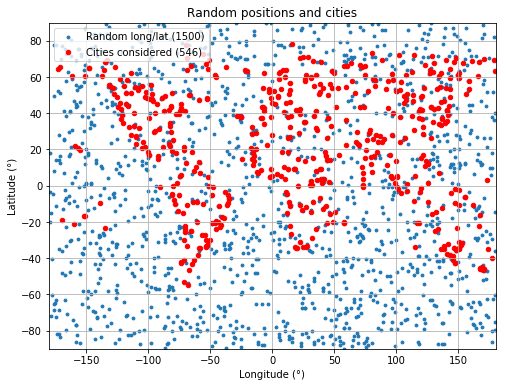

In [9]:
# Plot the random lat/long and the position of the related cities to see how they are distributed
# path to save figure
fig1_name = os.path.join("output_data",'fig1_cities_positions.png')

plt.figure(figsize=(8, 6),facecolor="w")

# plt.hold(True)
plt.scatter(lngs, lats, s=8, label=f"Random long/lat ({len(lngs)})") # plot the random lat and long values
plt.scatter(df.Lng, df.Lat, s=20, color="r", label=f"Cities considered ({nb_cities_with_data})")
# plt.scatter()
#TODO : plot the resulting lat and long values
# Making the figure prettier
plt.title('Random positions and cities')
plt.xlabel('Longitude (°)')   
plt.ylabel('Latitude (°)')
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.grid()
plt.legend()

# Save the figure and display the name in the log
plt.savefig(fig1_name)
logging.info(f"Created figure: {fig1_name}")

# Display the figure
plt.show()

There is considerably more land in the North hemisphere than the South --> we will have more data on the north hemisphere

In [10]:
south_cities = df.Lat.loc[df.Lat<=0].count()
north_cities = df.Lat.loc[df.Lat>0].count()
logging.info("%i cities in the North hemisphere (%.2f%%)"%(north_cities, north_cities/nb_cities_with_data*100))
logging.info("%i cities in the South hemisphere (%.2f%%)" %(south_cities,south_cities/nb_cities_with_data*100))

395 cities in the North hemisphere (72.34%)
151 cities in the South hemisphere (27.66%)


#### Latitude vs. Temperature Plot

In [11]:
# Building the string dating the data
str_date = time.strftime("%m-%d-%Y", time.gmtime(df['Date'][0]))

Created figure: output_data\fig2_Lat_vs_MaxTemp.png


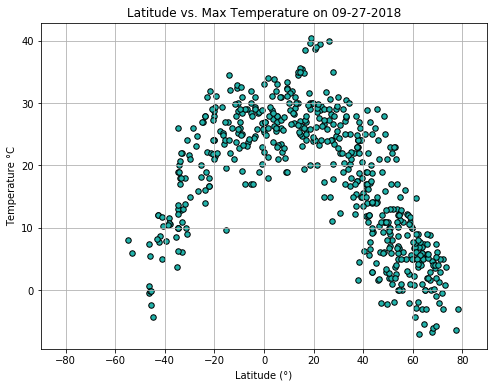

In [12]:
# File name for the figure
fig2_name = os.path.join("output_data",'fig2_Lat_vs_MaxTemp.png')

# Creating the figure
plt.figure(figsize=(8, 6),facecolor="w")
# Scatter plot
plt.scatter(df.Lat, df['Max Temp'], s=30, c="lightseagreen", edgecolors='k'      )
# Making the figure prettier
plt.title(f'Latitude vs. Max Temperature on %s'%(str_date))
plt.ylabel('Temperature °C')   
plt.xlabel('Latitude (°)')
plt.xlim(-90,90)
plt.grid()

# Save the figure and display the name in the log
plt.savefig(fig2_name)
logging.info(f"Created figure: {fig2_name}")

# Display the figure
plt.show()

#### Coordinates vs. Temperature
We try to use scatter plots to describe the Temperature parameter according to both coordinates parameters

Created figure: output_data\fig3_coord_MaxTemp.png


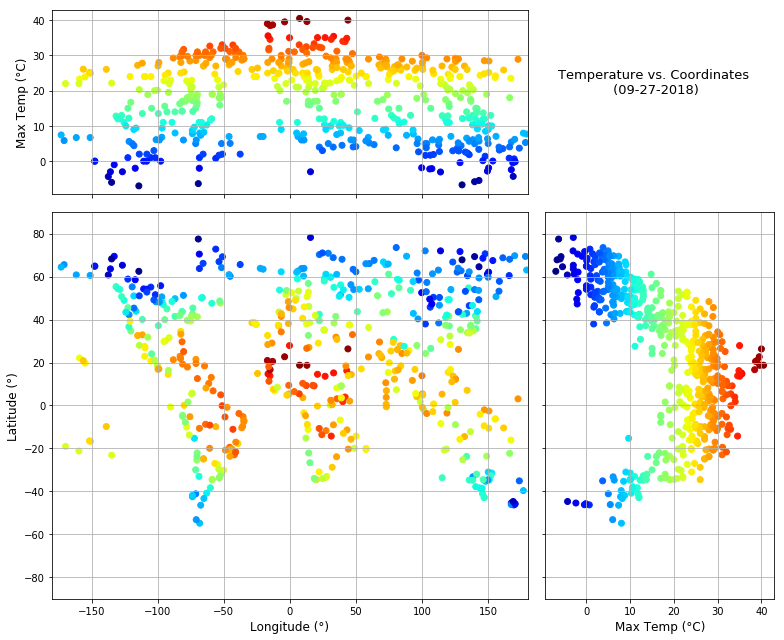

In [13]:
# File name for the figure
fig3_name = os.path.join("output_data",'fig3_coord_MaxTemp.png')

# Creating the figure
fig = plt.figure(figsize=(11, 9),facecolor="w")
plt.jet() #Setting the colormap

# We will make 3 plots on the figure:

# ax1/ A scatter plot of the cities coord coloring the dots with the temperature
#-------------------------------------------------------------------------------
ax1 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax1.scatter(df.Lng, df.Lat, c=df['Max Temp'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitude (°)', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)
plt.grid()

# ax2/ A scatter plot of x=Temp, y=Lat
#-------------------------------------
ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax2.scatter(df['Max Temp'], df.Lat, c=df['Max Temp'])
plt.ylim(-90,90)
ax2.yaxis.set_ticklabels([])
plt.xlabel('Max Temp (°C)', fontsize=12)
plt.grid()

# ax3/ A scatter plot of x=Long, y=Temp
#--------------------------------------
ax3 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax3.scatter(df.Lng, df['Max Temp'], c=df['Max Temp'])
plt.xlim(-180,180)
ax3.xaxis.set_ticklabels([])
plt.ylabel('Max Temp (°C)', fontsize=12)
plt.grid()

# Adding the title on the top right spare space
plt.gcf().text(0.83, 0.85, f"Temperature vs. Coordinates\n ({str_date})", 
               fontsize=13, horizontalalignment="center")

plt.tight_layout()

#Save the figure and display the name in the log
plt.savefig(fig3_name)
logging.info(f"Created figure: {fig3_name}")

# Display the figure
plt.show()

* Correlating the global position to the previous plot (Latitude vs. Temp) help us explain the few outlier cities that are within the -30/30 latitude range but still have low temperature.
They seem to be located on high altitude regions (Andes or Himalaya).
* By observing the Temperature / Longitude plot, we notice, as expected, that there is no strong correlation between the West-East location and the temperature. However, we can notice that more "hot" cities are located on the Eastern part of the world. It may only be related to the repartition of land and population with a lot of cities in South-East Asia.

#### Latitude vs. Humidity Plot

Created figure: output_data\fig4_coord_Humidity.png


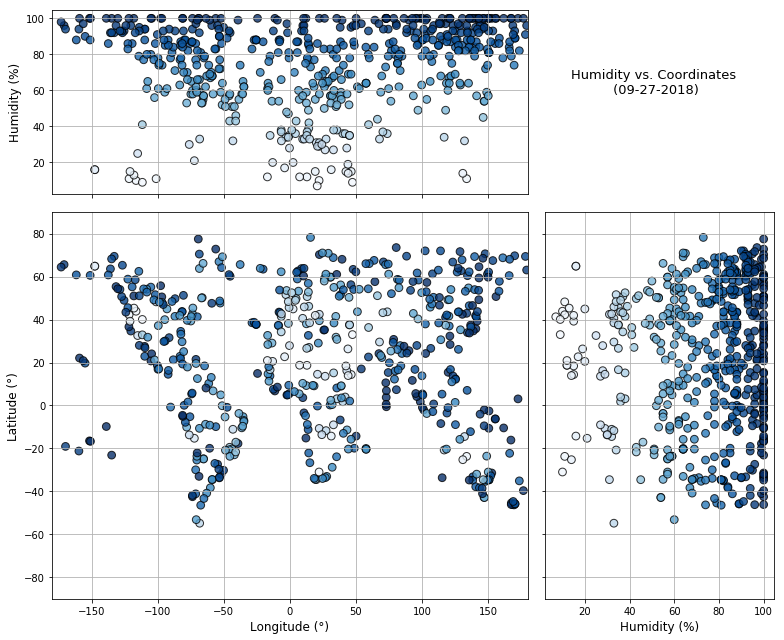

In [19]:
# File name for the figure
fig4_name = os.path.join("output_data",'fig4_coord_Humidity.png')

# Depending on the cities selection there are one or two cities with almost 300% of humidity
# These are very high values and we choose to set them to 100 to facilitate the plot readibility
df.loc[df["Humidity"]>100, 'Humidity'] = 100

# Creating the figure
fig = plt.figure(figsize=(11, 9),facecolor="w")
plt.set_cmap('Blues') # Set the colormap

# We will make 3 plots on the figure:

# ax1/ A scatter plot of the cities coord coloring the dots with the temperature
#-------------------------------------------------------------------------------
ax1 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax1.scatter(df.Lng, df.Lat, c=df['Humidity'], edgecolors="k", s=60, alpha=0.8)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitude (°)', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)
plt.grid()

# ax2/ A scatter plot of x=Temp, y=Lat
#-------------------------------------
ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax2.scatter(df['Humidity'], df.Lat, c=df['Humidity'], edgecolors="k", s=60, alpha=0.8)
plt.ylim(-90,90)
ax2.yaxis.set_ticklabels([])
plt.xlabel('Humidity (%)', fontsize=12)
plt.grid()

# ax3/ A scatter plot of x=Long, y=Temp
#--------------------------------------
ax3 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax3.scatter(df.Lng, df['Humidity'], c=df['Humidity'], edgecolors="k", s=60, alpha=0.8)
plt.xlim(-180,180)
ax3.xaxis.set_ticklabels([])
plt.ylabel('Humidity (%)', fontsize=12)
plt.grid()

# Adding the title on the top right spare space
plt.gcf().text(0.83, 0.85, f"Humidity vs. Coordinates\n ({str_date})", 
               fontsize=13, horizontalalignment="center")

plt.tight_layout()

#Save the figure and display the name in the log
plt.savefig(fig4_name)
logging.info(f"Created figure: {fig4_name}")

# Display the figure
plt.show()

* There is no strong correlation between Latitude and Humidity.
* Even if extremely desertic or humid area are not the most populated, the colormap plot with both coordinate allows to regognize some desertic places.
* We can also notice that the drier places are not located on the equator, but are more encountered on -30 and +30° of latitudes.

#### Latitude vs. Cloudiness Plot

Created figure: output_data\fig5_coord_Clouds.png


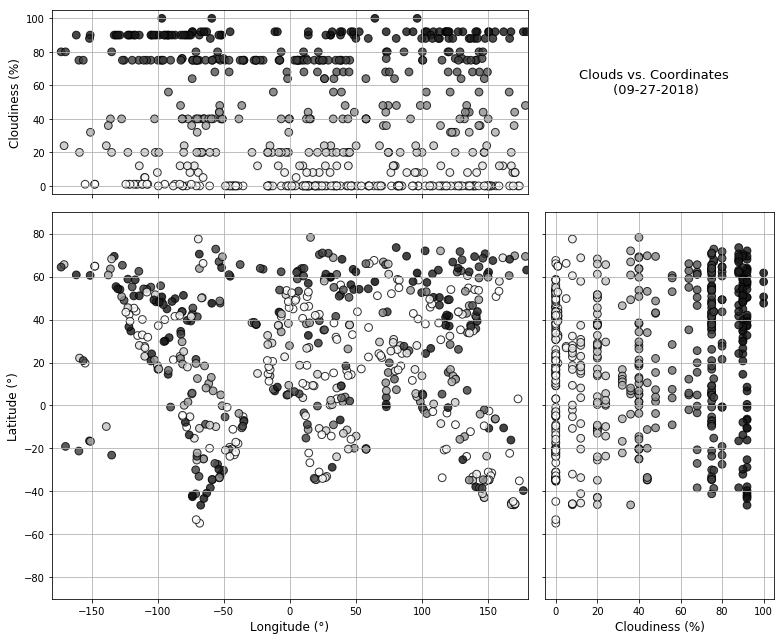

In [15]:
# File name for the figure
fig5_name = os.path.join("output_data",'fig5_coord_Clouds.png')

# Creating the figure
fig = plt.figure(figsize=(11, 9),facecolor="w")
plt.set_cmap('gist_yarg') # Set the colormap

# We will make 3 plots on the figure:

# ax1/ A scatter plot of the cities coord coloring the dots with the temperature
#-------------------------------------------------------------------------------
ax1 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax1.scatter(df.Lng, df.Lat, c=df['Clouds'], edgecolors="k", s=60, alpha=0.8)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitude (°)', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)
plt.grid()

# ax2/ A scatter plot of x=Temp, y=Lat
#-------------------------------------
ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax2.scatter(df['Clouds'], df.Lat, c=df['Clouds'], edgecolors="k", s=60, alpha=0.8)
plt.ylim(-90,90)
ax2.yaxis.set_ticklabels([])
plt.xlabel('Cloudiness (%)', fontsize=12)
plt.grid()

# ax3/ A scatter plot of x=Long, y=Temp
#--------------------------------------
ax3 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax3.scatter(df.Lng, df['Clouds'], c=df['Clouds'], edgecolors="k", s=60, alpha=0.8)
plt.xlim(-180,180)
ax3.xaxis.set_ticklabels([])
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.grid()

# Adding the title on the top right spare space
plt.gcf().text(0.83, 0.85, f"Clouds vs. Coordinates\n ({str_date})", 
               fontsize=13, horizontalalignment="center")

plt.tight_layout()

#Save the figure and display the name in the log
plt.savefig(fig5_name)
logging.info(f"Created figure: {fig5_name}")

# Display the figure
plt.show()

* No strong correlation between latitude and clouds
* We can notice that the quantification of clouds have "steps". It may be related to the way the data is measured.

#### Latitude vs. Wind Speed Plot

Created figure: output_data\fig6_coord_Clouds.png


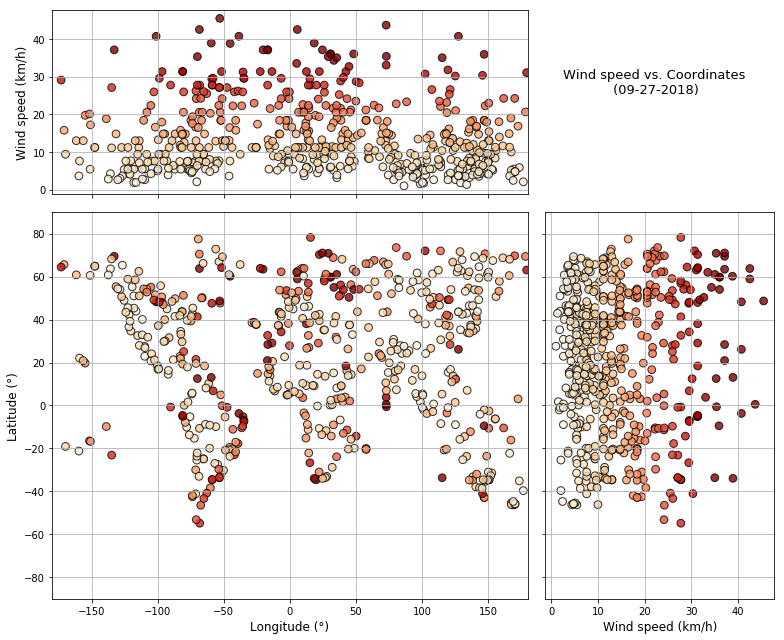

In [16]:
# File name for the figure
fig6_name = os.path.join("output_data",'fig6_coord_Clouds.png')

# Creating the figure
fig = plt.figure(figsize=(11, 9),facecolor="w")
plt.set_cmap('OrRd') # Set the colormap
# I couldn't find an elegant way to set the color limits (--> always apply only to imshow)
# so let's do it the dirty way:
wind_speed_col = [ 35 if ws >=35 else ws for ws in df['Wind speed']]

# We will make 3 plots on the figure:

# ax1/ A scatter plot of the cities coord coloring the dots with the temperature
#-------------------------------------------------------------------------------
ax1 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax1.scatter(df.Lng, df.Lat, c=wind_speed_col, edgecolors="k", s=60, alpha=0.8)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitude (°)', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)
plt.grid()
# plt.clim(-4,4)

# ax2/ A scatter plot of x=Temp, y=Lat
#-------------------------------------
ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax2.scatter(df['Wind speed'], df.Lat, c=wind_speed_col, edgecolors="k", s=60, alpha=0.8)
plt.ylim(-90,90)
ax2.yaxis.set_ticklabels([])
plt.xlabel('Wind speed (km/h)', fontsize=12)
plt.grid()

# ax3/ A scatter plot of x=Long, y=Temp
#--------------------------------------
ax3 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax3.scatter(df.Lng, df['Wind speed'], c=wind_speed_col, edgecolors="k", s=60, alpha=0.8)
plt.xlim(-180,180)
ax3.xaxis.set_ticklabels([])
plt.ylabel('Wind speed (km/h)', fontsize=12)
plt.grid()

# Adding the title on the top right spare space
plt.gcf().text(0.83, 0.85, f"Wind speed vs. Coordinates\n ({str_date})", 
               fontsize=13, horizontalalignment="center")

plt.tight_layout()

#Save the figure and display the name in the log
plt.savefig(fig6_name)
logging.info(f"Created figure: {fig6_name}")

# Display the figure
plt.show()